# Lab 8: Sampling and Distributions - Sampling Basketball Data

Welcome to Lab 8! In this lab we will go over the topic of [sampling and distributions](https://www.inferentialthinking.com/chapters/10/Sampling_and_Empirical_Distributions.html).

The data used in this lab will contain salary data and other statistics for basketball players from the 2014-2015 NBA season. This data was collected from the following sports analytic sites: [Basketball Reference](http://www.basketball-reference.com) and [Spotrac](http://www.spotrac.com).

First, set up the tests and imports by running the cell below.

In [1]:
# Run this cell, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Run the cell below to load player and salary data that we will use for our sampling. 

In [2]:
player_data = Table().read_table("player_data.csv")
salary_data = Table().read_table("salary_data.csv")
full_data = salary_data.join("PlayerName", player_data, "Name")

# The show method immediately displays the contents of a table. 
# This way, we can display the top of two tables using a single cell.
player_data.show(3)
salary_data.show(3)
full_data.show(3)

Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
James Harden,25,HOU,81,459,565,154,60,321,2217
Chris Paul,29,LAC,82,376,838,156,15,190,1564
Stephen Curry,26,GSW,80,341,619,163,16,249,1900


PlayerName,Salary
Kobe Bryant,23500000
Amar'e Stoudemire,23410988
Joe Johnson,23180790


PlayerName,Salary,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
A.J. Price,62552,28,TOT,26,32,46,7,0,14,133
Aaron Brooks,1145685,30,CHI,82,166,261,54,15,157,954
Aaron Gordon,3992040,19,ORL,47,169,33,21,22,38,243


Rather than getting data on every player (as in the tables loaded above), imagine that we had gotten data on only a smaller subset of the players. For 492 players, it's not so unreasonable to expect to see all the data, but usually we aren't so lucky. 

If we want to make estimates about a certain numerical property of the population (known as a statistic, e.g. the mean or median), we may have to come up with these estimates based only on a smaller sample. Whether these estimates are useful or not often depends on how the sample was gathered. We have prepared some example sample datasets to see how they compare to the full NBA dataset. Later we'll ask you to create your own samples to see how they behave.

To save typing and increase the clarity of your code, we will package the analysis code into a few functions. This will be useful in the rest of the lab as we will repeatedly need to create histograms and collect summary statistics from that data.

We've defined the `histograms` function below, which takes a table with columns `Age` and `Salary` and draws a histogram for each one. It uses bin widths of 1 year for `Age` and $1,000,000 for `Salary`.

Two histograms should be displayed below


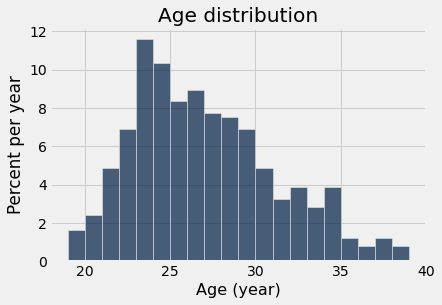

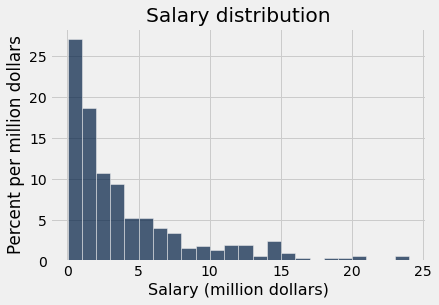

In [3]:
def histograms(t):
    ages = t.column('Age')
    salaries = t.column('Salary')/1000000
    t1 = t.drop('Salary').with_column('Salary', salaries)
    age_bins = np.arange(min(ages), max(ages) + 2, 1) 
    salary_bins = np.arange(min(salaries), max(salaries) + 1, 1)
    t1.hist('Age', bins=age_bins, unit='year')
    plt.title('Age distribution')
    t1.hist('Salary', bins=salary_bins, unit='million dollars')
    plt.title('Salary distribution') 
    
histograms(full_data)
print('Two histograms should be displayed below')

<span style='background:yellow'>**Question 1.**</span>. Create a function called `compute_statistics` that takes a table containing ages and salaries and:
- Draws a histogram of ages
- Draws a histogram of salaries
- Returns a two-element array containing the average age and average salary (in that order)

You can call the `histograms` function to draw the histograms! 

*Note:* More charts will be displayed when running the test cell. Please feel free to ignore the charts.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/datascience/tables.py:5800: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


[26.536585365853657, 4269775.766260159]

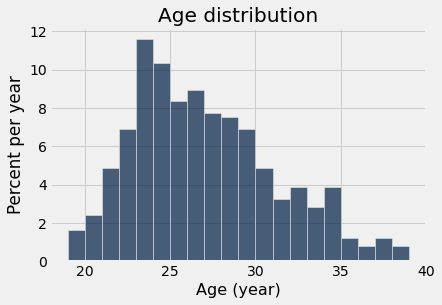

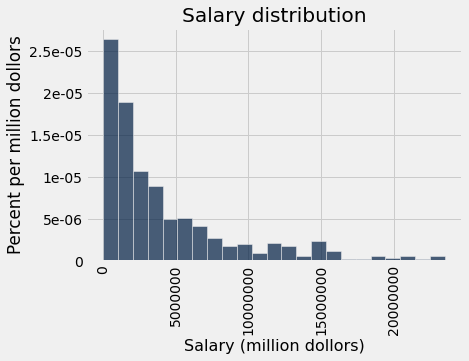

In [4]:
def compute_statistics(age_and_salary_data):
    a = []
    age = age_and_salary_data.column('Age')
    sal = age_and_salary_data.column('Salary') / 1000000
    age_bin = np.arange(min(age), max(age) + 2, 1)
    sal_bin = int(max(sal) - min(sal) / 1000)
    age_and_salary_data.hist('Age', bins = age_bin, unit = 'year')
    plt.title('Age distribution')
    age_and_salary_data.hist('Salary', bins = sal_bin, unit = 'million dollors')
    plt.title('Salary distribution')
    a = ([sum(age) / len(age), sum(sal) / len(sal) * 1000000])
    
    return a

full_stats = compute_statistics(full_data)
full_stats

In [5]:
# TEST
stats = compute_statistics(full_data)
plt.close()
plt.close()
round(float(stats[0]), 2) == 26.54

True

In [6]:
# TEST
stats = compute_statistics(full_data)
plt.close()
plt.close()
round(float(stats[1]), 2) == 4269775.77

True

### Convenience sampling
One sampling methodology, which is **generally a bad idea**, is to choose players who are somehow convenient to sample.  For example, you might choose players from one team who are near your house, since it's easier to survey them.  This is called, somewhat pejoratively, *convenience sampling*.

Suppose you survey only *relatively new* players with ages less than 22.  (The more experienced players didn't bother to answer your surveys about their salaries.)

<span style='background:yellow'>**Question 2.**</span>  Assign `convenience_sample` to a subset of `full_data` that contains only the rows for players under the age of 22.

In [7]:
convenience_sample = full_data.where(full_data.column('Age') < 22)
convenience_sample

PlayerName,Salary,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
Aaron Gordon,3992040,19,ORL,47,169,33,21,22,38,243
Alex Len,3649920,21,PHO,69,454,32,34,105,74,432
Andre Drummond,2568360,21,DET,82,1104,55,73,153,120,1130
Andrew Wiggins,5510640,19,MIN,82,374,170,86,50,177,1387
Anthony Bennett,5563920,21,MIN,57,216,48,27,16,36,298
Anthony Davis,5607240,21,NOP,68,696,149,100,200,95,1656
Archie Goodwin,1112280,20,PHO,41,74,44,18,9,48,231
Ben McLemore,3026280,21,SAC,82,241,140,77,19,138,996
Bradley Beal,4505280,21,WAS,63,241,194,76,18,123,962
Bruno Caboclo,1458360,19,TOR,8,2,0,0,1,4,10


In [8]:
# TEST
convenience_sample.num_columns == 11

True

In [9]:
# TEST
convenience_sample.num_rows == 44

True

<span style='background:yellow'>**Question 3.**</span> Assign `convenience_stats` to an array of the average age and average salary of your convenience sample, using the `compute_statistics` function.  Since they're computed on a sample, these are called *sample averages*. 

In [10]:
age = convenience_sample.column('Age')
sal = convenience_sample.column('Salary')
convenience_stats = ([sum(age) / len(age), sum(sal) / len(sal)])
convenience_stats

[20.363636363636363, 2383533.8181818184]

In [11]:
# TEST
len(convenience_stats) == 2

True

In [12]:
# TEST 
round(float(convenience_stats[0]), 2) == 20.36

True

In [13]:
# TEST
round(float(convenience_stats[1]), 2) == 2383533.82

True

Next, we'll compare the convenience sample salaries with the full data salaries in a single histogram. To do that, we'll need to use the `bin_column` option of the `hist` method, which indicates that all columns are counts of the bins in a particular column. The following cell does not require any changes; **just run it**.

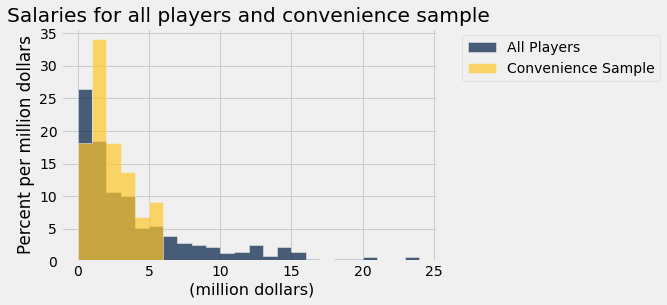

In [14]:
def compare_salaries(first, second, first_title, second_title):
    """Compare the salaries in two tables."""
    first_salary_in_millions = first.column('Salary')/1000000
    second_salary_in_millions = second.column('Salary')/1000000
    first_tbl_millions = first.drop('Salary').with_column('Salary', first_salary_in_millions)
    second_tbl_millions = second.drop('Salary').with_column('Salary', second_salary_in_millions)
    max_salary = max(np.append(first_tbl_millions.column('Salary'), second_tbl_millions.column('Salary')))
    bins = np.arange(0, max_salary+1, 1)
    first_binned = first_tbl_millions.bin('Salary', bins=bins).relabeled(1, first_title)
    second_binned = second_tbl_millions.bin('Salary', bins=bins).relabeled(1, second_title)
    first_binned.join('bin', second_binned).hist(bin_column='bin', unit='million dollars')
    plt.title('Salaries for all players and convenience sample')

compare_salaries(full_data, convenience_sample, 'All Players', 'Convenience Sample')

<span style='background:yellow'>**Question 4.**</span> Does the convenience sample give us an accurate picture of the salary of the full population? Would you expect it to, in general? Before you move on, write a short answer in English below. You can refer to the statistics calculated above or perform your own analysis.

No, the convenience sample do not give us an accurate picture of the salary of the full population. The graph would be more accuaret if we differentiate the colrs. We believe that this would be accurate if we make changes to the graph combination.

### Simple random sampling
A more justifiable approach is to sample uniformly at random from the players.  In a **simple random sample (SRS) without replacement**, we ensure that each player is selected at most once. Imagine writing down each player's name on a card, putting the cards in an box, and shuffling the box.  Then, pull out cards one by one and set them aside, stopping when the specified sample size is reached.

### Producing simple random samples
Sometimes, it’s useful to take random samples even when we have the data for the whole population. It helps us understand sampling accuracy.

### `sample`

The table method `sample` produces a random sample from the table. By default, it draws at random **with replacement** from the rows of a table. It takes in the sample size as its argument and returns a **table** with only the rows that were selected. 

Run the cell below to see an example call to `sample()` with a sample size of 5, with replacement.

In [15]:
# Just run this cell

salary_data.sample(5)

PlayerName,Salary
Stephen Curry,10629213
Rajon Rondo,12909091
Alec Burks,3034356
Joel Anthony,3800000
Andre Dawkins,29843


The optional argument `with_replacement=False` can be passed through `sample()` to specify that the sample should be drawn without replacement.

Run the cell below to see an example call to `sample()` with a sample size of 5, without replacement.

In [16]:
# Just run this cell

salary_data.sample(5, with_replacement=False)

PlayerName,Salary
Vince Carter,3911981
DeAndre Jordan,11440124
Darius Morris,702756
Brandan Wright,5000000
Reggie Bullock,1200720


<span style='background:yellow'>**Question 5.**</span> Produce a simple random sample of size 44 from `full_data`. Run your analysis on it again.  Run the cell a few times to see how the histograms and statistics change across different samples.

PlayerName       | Salary   | Age  | Team | Games | Rebounds | Assists | Steals | Blocks | Turnovers | Points
Rodney Stuckey   | 1227985  | 28   | IND  | 71    | 248      | 219     | 56     | 10     | 118       | 896
Jeffery Taylor   | 915243   | 25   | CHO  | 29    | 53       | 22      | 12     | 1      | 19        | 127
Brook Lopez      | 15719063 | 26   | BRK  | 72    | 535      | 50      | 43     | 126    | 104       | 1236
Mirza Teletovic  | 3368100  | 29   | BRK  | 40    | 194      | 46      | 14     | 16     | 53        | 339
Hassan Whiteside | 769881   | 25   | MIA  | 48    | 482      | 6       | 27     | 123    | 58        | 564
Noah Vonleh      | 2524200  | 19   | CHO  | 25    | 86       | 4       | 4      | 9      | 11        | 83
Evan Fournier    | 1483920  | 22   | ORL  | 58    | 153      | 120     | 40     | 2      | 82        | 698
Kyle O'Quinn     | 915243   | 24   | ORL  | 51    | 199      | 59      | 31     | 39     | 55        | 294
Nick Johnson     | 507336   | 22  

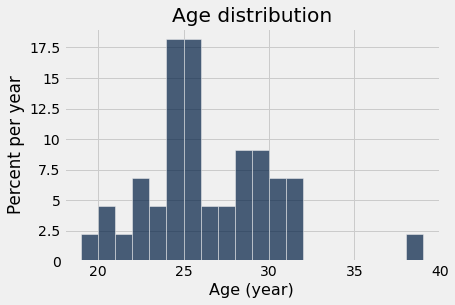

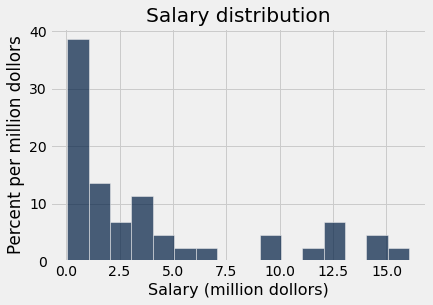

[25.886363636363637, 1000000.0]

In [17]:
my_small_srswor_data = full_data.sample(44)
print(my_small_srswor_data)
def histogram(table):
    age = table.column('Age')
    sal = table.column('Salary') / 1000000
    tbl = table.drop('Salary').with_column('Salary', sal)
    age_bin = np.arange(min(age), max(age) + 2, 1)
    sal_bin = np.arange(min(sal), max(sal) + 1, 1)
    tbl.hist('Age', bins = age_bin, unit = 'year')
    plt.title('Age distribution')
    tbl.hist('Salary', bins = sal_bin, unit = 'million dollors')
    plt.title('Salary distribution')
    plt.show()
    
histogram(my_small_srswor_data)
my_small_stats = ([sum(my_small_srswor_data.column('Age')) / len(my_small_srswor_data.column('Age')),
                  sum(my_small_srswor_data.column('Salary')) / sum(my_small_srswor_data.column('Salary')) * 1000000])
my_small_stats

Before you move on, write a short answer for the following questions in English:

- How much does the average age change across samples? 
- What about average salary?

1. The average could be calaulated by using mean of ages. Since, we have different age group people with different percentages. The highest percentage lies between  age group 25 and 28, hence the average must be around 26.5.
2. The salary disctribution is decreasing if the mllion dollor increases, the average salary lies between 2 to 4 per the histogram.

<span style='background:yellow'>**Question 6.**</span> As in the previous question, analyze several simple random samples of size 100 from `full_data`.  

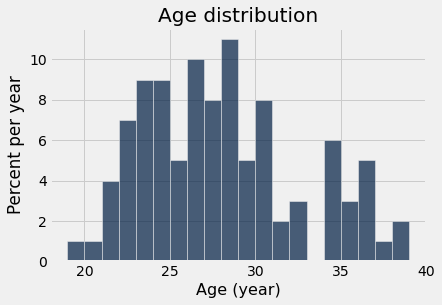

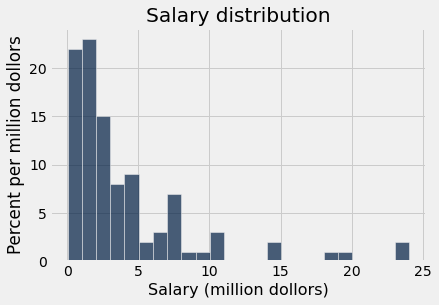

[27.54, 3965641040000.0]

In [18]:
my_large_srswor_data = full_data.sample(100)
def histogram(table):
    age = table.column('Age')
    sal = table.column('Salary') / 1000000
    tbl = table.drop('Salary').with_column('Salary', sal)
    age_bin = np.arange(min(age), max(age) + 2, 1)
    sal_bin = np.arange(min(sal), max(sal) + 1, 1)
    tbl.hist('Age', bins = age_bin, unit = 'year')
    plt.title('Age distribution')
    tbl.hist('Salary', bins = sal_bin, unit = 'million dollors')
    plt.title('Salary distribution')
    plt.show()
    
histogram(my_large_srswor_data)
age1 = my_large_srswor_data.column('Age')
sal1 = my_large_srswor_data.column('Salary') 
my_large_stats = ([sum(age1) / len(age1), sum(sal1) / len(sal1) * 1000000])
my_large_stats

Answer the following questions in English:

- Do the histogram shapes seem to change more or less across samples of 100 than across samples of size 44?  
- Are the sample averages and histograms closer to their true values/shape for age or for salary?  What did you expect to see?

1. Yes, histogram shapes seemed to be changed more for the samples of 100 than 44. As the sample increase the more number of bins involvement makes hostogram changes.
2. Yes, the sample averages and histograms are closer to their shapes for age and salary.

Congratulations, you're done with Lab 8! Be sure to...

* run all the tests,
* print the notebook as a PDF,
* and submit both the notebook and the PDF to Canvas.